# 1: IMPORT & EXPLORE DATASET FOR FACIAL EXPRESSION DETECTION

In [1]:
# Import the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers

In [2]:
# read the csv files for the facial expression data
facialexpression_df = pd.read_csv('/content/drive/My Drive/Proj/Untitled folder/icml_face_data.csv')
facialexpression_df.head(10)

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3,2,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
5,3,85 84 90 121 101 102 133 153 153 169 177 189 1...
6,0,30 24 21 23 25 25 49 67 84 103 120 125 130 139...
7,3,4 2 13 41 56 62 67 87 95 62 65 70 80 107 127 1...
8,4,107 107 109 109 109 109 110 101 123 140 144 14...
9,3,14 14 18 28 27 22 21 30 42 61 77 86 88 95 100 ...


In [3]:
facialexpression_df[' pixels'][0] # String format

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [4]:
def string2array(x):
  '''
   function to convert pixel values in string format to array format
  '''
  return np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')

def resize(x):
  '''
   Resize images from (48, 48) to (96, 96)
  '''
  img = x.reshape(48,48)
  return cv2.resize(x, dsize=(96,96), interpolation=cv2.INTER_CUBIC)

In [5]:
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: resize(string2array(x)))
facialexpression_df

,emotion,pixels
0,0,"[[69.316925, 73.03865, 79.13719, 84.17186, 85...."
1,0,"[[151.09435, 150.91393, 150.65791, 148.96367, ..."
2,2,"[[23.061905, 25.50914, 29.47847, 33.99843, 36...."
3,2,"[[20.083221, 19.079437, 17.398712, 17.158691, ..."
4,3,"[[76.26172, 76.54747, 77.001785, 77.7672, 78.4..."
...,...,...
24563,3,"[[-4.901001, 5.6496277, 22.477203, 49.366516, ..."
24564,0,"[[181.71645, 179.72063, 176.40785, 175.93037, ..."
24565,3,"[[178.1166, 176.83118, 174.74146, 172.61276, 1..."
24566,0,"[[16.883408, 16.953583, 17.081573, 16.53476, 1..."


# 2: VISUALIZE IMAGES AND PLOT LABELS

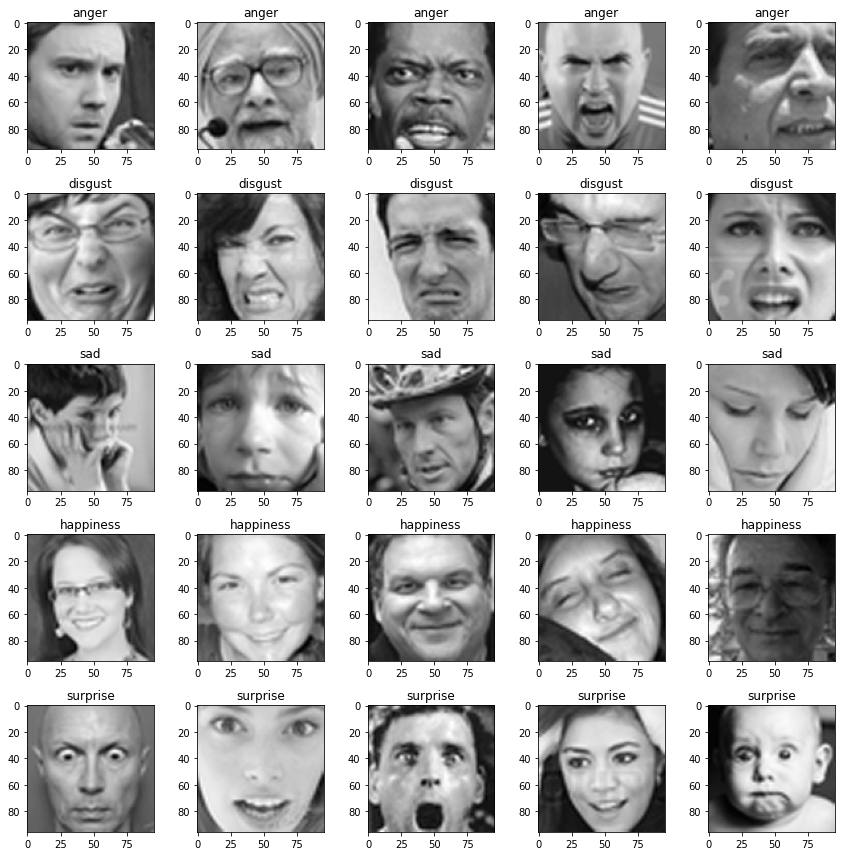

In [6]:
label_to_text = {0:'anger', 1:'disgust', 2:'sad', 3:'happiness', 4: 'surprise'}
emotions = [0, 1, 2, 3, 4]
count = 0

fig, axs = plt.subplots(5,5, figsize=(12,12))
for i in emotions:
  data = facialexpression_df[facialexpression_df['emotion'] == i]
  for img in data[' pixels']:
    img = img.reshape(96,96)
    axs[i][count].imshow(img, cmap='gray')
    axs[i][count].title.set_text(label_to_text[i])
    count +=1
    if count==5:
      break
  count = 0
fig.tight_layout()

In [7]:
facialexpression_df.emotion.value_counts().index

Int64Index([3, 2, 0, 4, 1], dtype='int64')

In [8]:
facialexpression_df.emotion.value_counts()

3    8989
2    6077
0    4953
4    4002
1     547
Name: emotion, dtype: int64

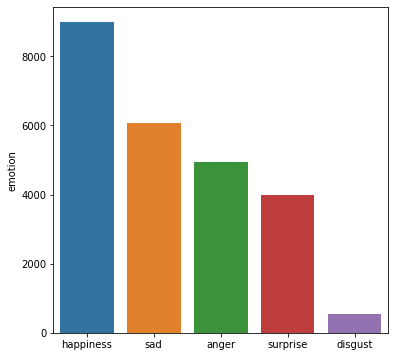

In [9]:
plt.figure(figsize=(6,6))
sns.barplot(x=[label_to_text[i] for i in facialexpression_df.emotion.value_counts().index],
            y=facialexpression_df.emotion.value_counts()
           );

# 3: DATA PREPARATION AND IMAGE AUGMENTATION

In [10]:
# split the dataframe in to features and labels
from keras.utils import to_categorical

X = facialexpression_df[' pixels']
y = to_categorical(facialexpression_df['emotion'])

X = np.stack(X, axis=0)
X = X.reshape(24568, 96, 96,1)
X.shape, y.shape

((24568, 96, 96, 1), (24568, 5))

In [14]:
# spliting dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_val, y_val, test_size=0.5, random_state=42)
print("Train Set", X_train.shape, y_train.shape)
print("Val Set", X_val.shape, y_val.shape)
print("Test Set",X_test.shape, y_test.shape)

Train Set (22111, 96, 96, 1) (22111, 5)
Val Set (1229, 96, 96, 1) (1229, 5)
Test Set (1228, 96, 96, 1) (1228, 5)


In [15]:
# image normalization

X_train = X_train/255
X_val   = X_val /255
X_test  = X_test/255

In [16]:
# data argumentation
datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.1,
                             shear_range=0.1,
                             horizontal_flip=True,
                             fill_mode="nearest"
                            )

# 4: BUILD AND TRAIN DEEP LEARNING MODEL FOR FACIAL EXPRESSION CLASSIFICATION

In [17]:
def res_block(X, filter, stage):

  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [18]:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# 1 - stage
X = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)

# 2 - stage
X = res_block(X, filter= [64, 64, 256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128, 128, 512], stage= 3)

# 4 - stage
# X = res_block(X, filter= [256, 256, 1024], stage= 4)

# Average Pooling
X = AveragePooling2D((4, 4), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)

model = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 102, 102, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

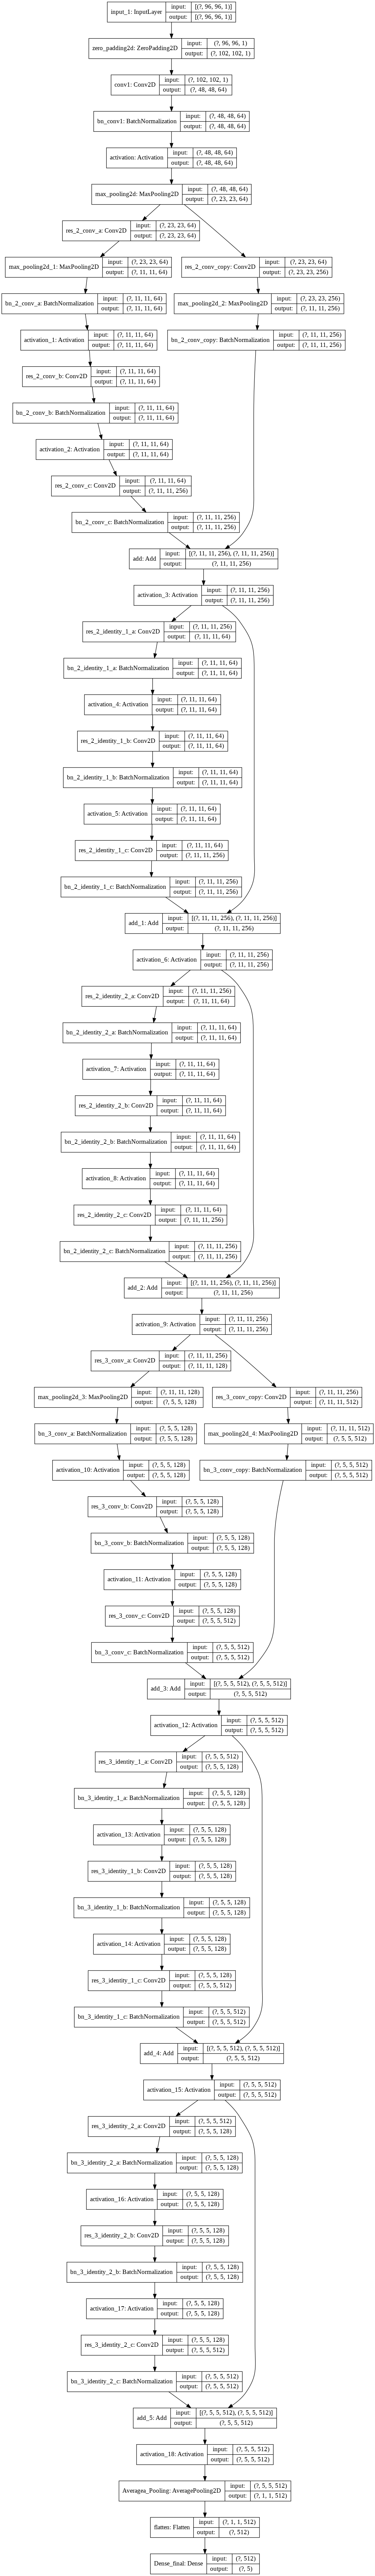

In [19]:
plot_model(model, show_shapes=True, to_file='/content/drive/My Drive/Proj/Untitled folder/expression model/facial-expression-model.png')

In [20]:
# compile the network
model.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

# define callbacks functions
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# save the best model with lower validation loss
path = '/content/drive/My Drive/Proj/Untitled folder/expression model/FacialExpression_weights.hdf5'
checkpointer = ModelCheckpoint(filepath = path, verbose = 1, save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=8, verbose=1, mode='min')

In [21]:
h = model.fit(datagen.flow(X_train, y_train, batch_size=64),
              validation_data=(X_val, y_val), 
              steps_per_epoch=len(X_train) // 64,
              epochs= 50, 
              callbacks=[checkpointer, earlystopping, reduce_lr]
              )

Epoch 1/50
345/345 [==============================] - ETA: 0s - loss: 1.2683 - accuracy: 0.4820
Epoch 00001: val_loss improved from inf to 1.38806, saving model to /content/drive/My Drive/Proj/Untitled folder/expression model/FacialExpression_weights.hdf5
345/345 [==============================] - 24s 68ms/step - loss: 1.2683 - accuracy: 0.4820 - val_loss: 1.3881 - val_accuracy: 0.4410
Epoch 2/50
345/345 [==============================] - ETA: 0s - loss: 0.9332 - accuracy: 0.6298
Epoch 00002: val_loss improved from 1.38806 to 0.97284, saving model to /content/drive/My Drive/Proj/Untitled folder/expression model/FacialExpression_weights.hdf5
345/345 [==============================] - 28s 80ms/step - loss: 0.9332 - accuracy: 0.6298 - val_loss: 0.9728 - val_accuracy: 0.6143
Epoch 3/50
345/345 [==============================] - ETA: 0s - loss: 0.8325 - accuracy: 0.6754
Epoch 00003: val_loss improved from 0.97284 to 0.86042, saving model to /content/drive/My Drive/Proj/Untitled folder/expre

In [29]:
# saving model architecure
model_json = model.to_json()
with open("/content/drive/My Drive/Proj/Untitled folder/expression model/FacialExpression-model.json","w") as json_file:
  json_file.write(model_json)

# 5: ASSESS THE PERFORMANCE OF TRAINED FACIAL EXPRESSION CLASSIFIER MODEL

In [23]:
h.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

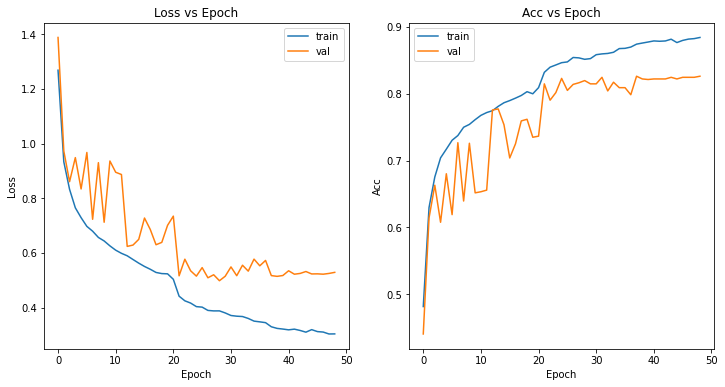

In [28]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])

plt.subplot(1,2,2)
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Acc vs Epoch')
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

In [31]:
_, acc = model.evaluate(X_test, y_test)
print("Accuracy on test set {:.2f} %".format(acc*100))

39/39 [==============================] - 0s 8ms/step - loss: 0.5619 - accuracy: 0.8119
Accuracy on test set 81.19 %


In [33]:
pred = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)

[[164   7  47  10   8]
 [  7  17   1   0   2]
 [ 46   0 220  17   9]
 [ 12   0  23 417  13]
 [ 12   0   5  12 179]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       236
           1       0.71      0.63      0.67        27
           2       0.74      0.75      0.75       292
           3       0.91      0.90      0.91       465
           4       0.85      0.86      0.85       208

    accuracy                           0.81      1228
   macro avg       0.78      0.77      0.77      1228
weighted avg       0.81      0.81      0.81      1228



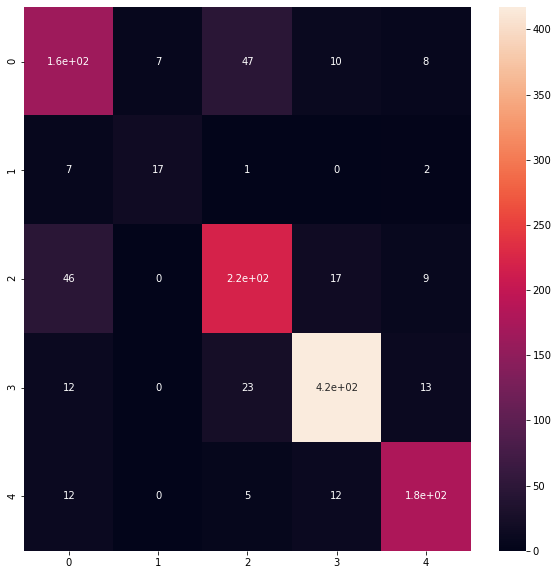

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_true, pred)
print(cm)
plt.figure(figsize = (10, 10));
sns.heatmap(cm, annot = True);

print(classification_report(y_true, pred))

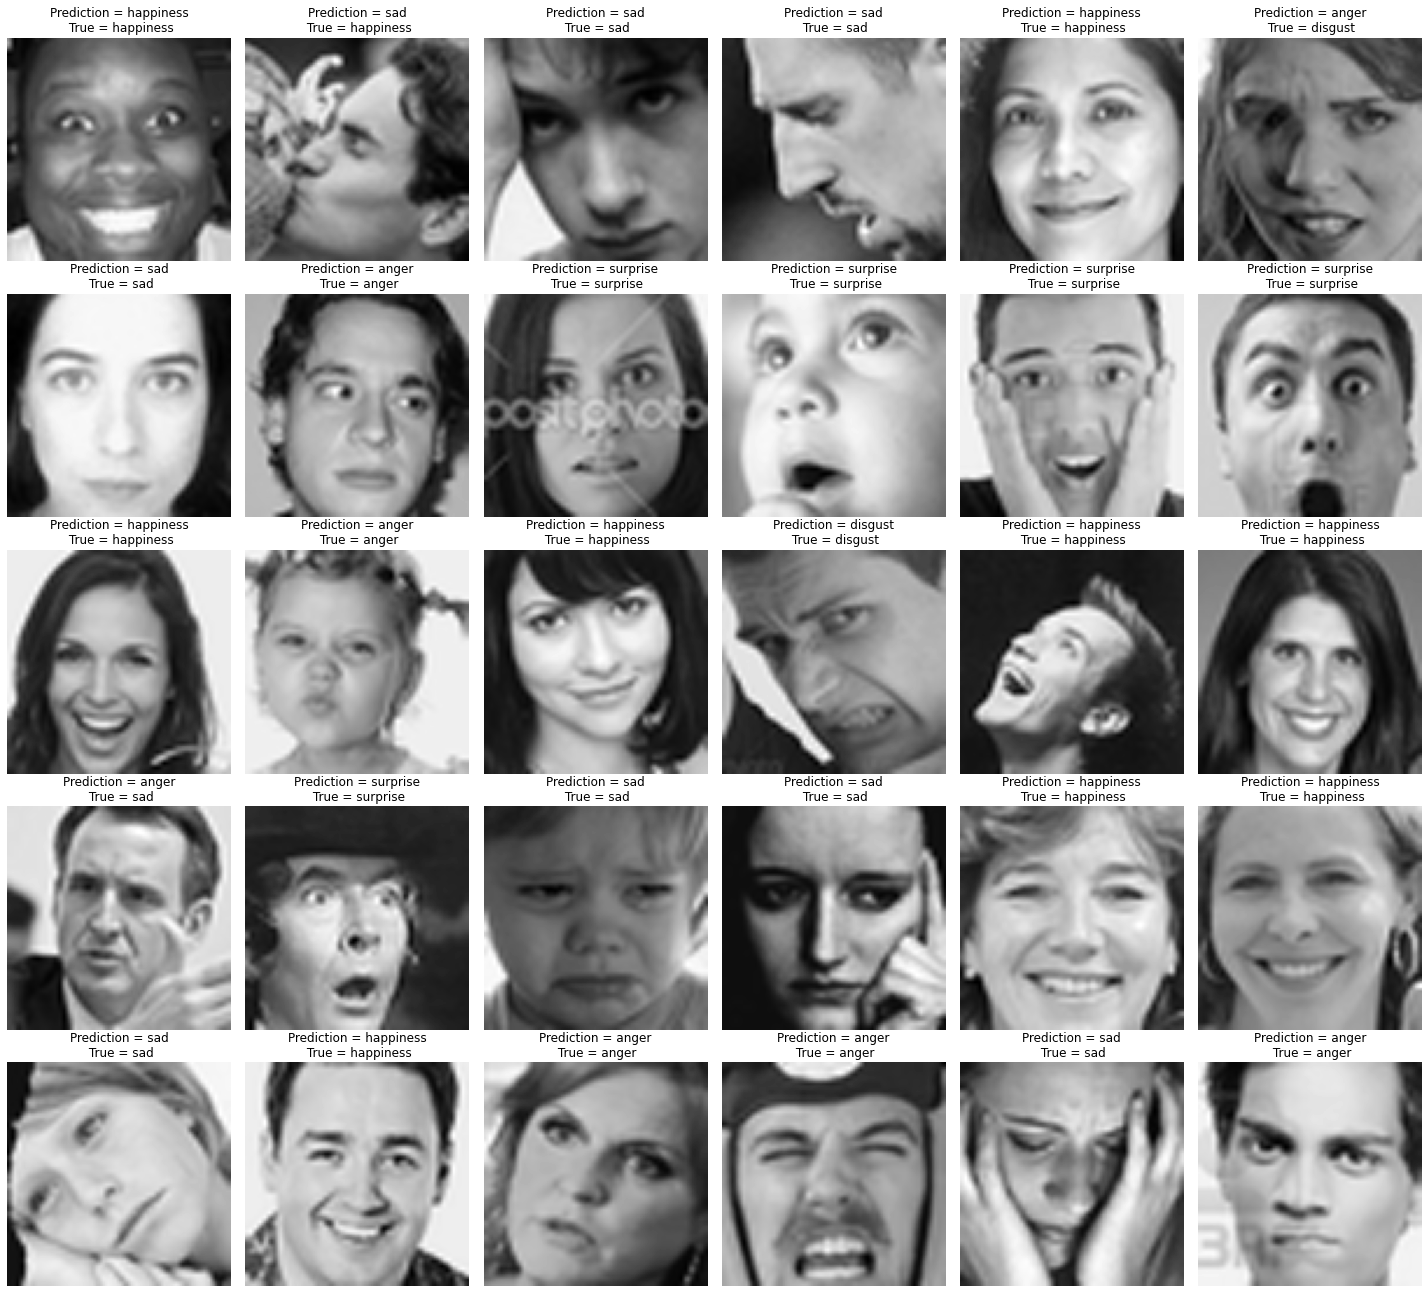

In [43]:
import random
l = 5
w = 6

fig, axs = plt.subplots(l, w, figsize=(20,18))
axs = axs.ravel()

for i in np.arange(0, l*w):
  k = random.randint(0, len(X_test))
  axs[i].imshow(X_test[k].reshape(96,96), cmap='gray')
  axs[i].set_title('Prediction = {}\n True = {}'.format(label_to_text[pred[k]], label_to_text[y_true[k]]))
  axs[i].axis('off')

fig.tight_layout()  

In [44]:
fig.savefig('/content/drive/My Drive/Proj/Untitled folder/expression model/exp-result.png')